In [1]:
import csv

with open('baltimore_crimes.csv') as f:
    csv_reader = csv.reader(f,delimiter=',')
    line_count= 0
    cnt = {}
    for row in csv_reader:
        if(line_count==0):
            print(f'{", ".join(row)}')
            line_count += 1
        else:
            try:
                cnt[row[7]]+=1
            except:
                cnt[row[7]]=1
            line_count += 1
        
print(f'Processed {line_count} lines.')


CrimeDate, CrimeTime, CrimeCode, Location, Description, Weapon, Post, District, Neighborhood, Location 1, Total Incidents
Processed 9642 lines.


In [2]:

labels = []
values = []
for key in cnt:
    labels.append(key)
    values.append(cnt[key])



import matplotlib.pyplot as plt



plt.plot(labels,values)
plt.xlabel('districts')
plt.ylabel('crime frequency')
plt.title('Frequency of crime incidents')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

<Figure size 640x480 with 1 Axes>

### Q1.) From Data we can see that Southeastern Has the highest frequency of crime and least in North Eastern.

In [3]:

import datetime
date = datetime.datetime(2019, 2, 11)

date.weekday()
dayfreq=[0]*7
days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

with open('baltimore_crimes.csv') as f1:
    csv_reader = csv.reader(f1,delimiter=',')
    line_count= 0
    for row in csv_reader:
        if(line_count==0):
            #print(f'{", ".join(row)}')
            line_count += 1
        else:
            #print(row[0])
            date = datetime.datetime(int(float(row[0][6:10])),int(float(row[0][0:2])),int(float(row[0][3:5])))
            day = date.weekday()
            #print(int(float(row[0][3:5])))
            dayfreq[day]+=1
            line_count += 1



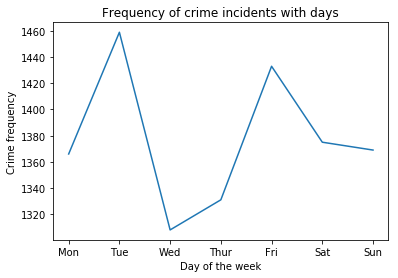

In [4]:
plt.plot(days,dayfreq)
plt.xlabel('Day of the week')
plt.ylabel('Crime frequency')
plt.title('Frequency of crime incidents with days')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


### Q3) From graph we can see that most of crime has happened on Tuesday

In [5]:
mpcrime = {}

with open('baltimore_crimes.csv') as f1:
    csv_reader = csv.reader(f1,delimiter=',')
    line_count= 0
    for row in csv_reader:
        if(line_count==0):
            #print(f'{", ".join(row)}')
            line_count += 1
        else:
            #print(row[0])
            time=  row[1]
            if(int(float(time[0:2])) >= 20 and int(float(time[0:2])) <=23):
                try:
                    mpcrime[row[2]] += 1
                except:
                    mpcrime[row[2]] = 1
            line_count += 1



In [6]:
crimes = []
freq = []
mx = 0
nm = ""
for i in mpcrime:
    crimes.append(i)
    if(mpcrime[i]>mx):
        mx=mpcrime[i]
        nm = i
    freq.append(mpcrime[i])
print(nm)

6D


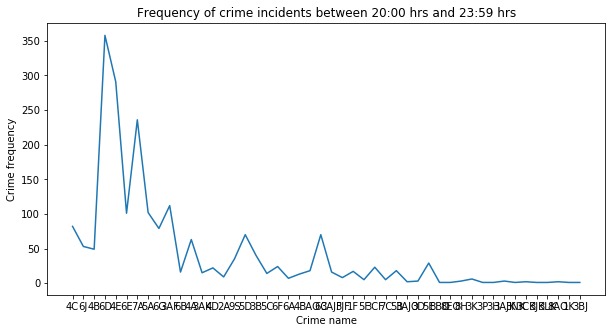

In [7]:
plt.plot(crimes,freq)
plt.xlabel('Crime name')
plt.ylabel('Crime frequency')
plt.title('Frequency of crime incidents between 20:00 hrs and 23:59 hrs')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

### Q3) From graph we can say that most frequent crime between 2000 and 2359 is 6D

In [8]:
mpcrime1 = {}

with open('baltimore_crimes.csv') as f1:
    csv_reader = csv.reader(f1,delimiter=',')
    line_count= 0
    for row in csv_reader:
        if(line_count==0):
            #print(f'{", ".join(row)}')
            line_count += 1
        else:
            #print(row[0])
            try:
                mpcrime1[row[2]] += 1
            except:
                mpcrime1[row[2]] = 1
            line_count += 1


In [9]:
crimes = []
freq = []
mx = 0
nm = ""
for i in mpcrime1:
    crimes.append(i)
    if(mpcrime1[i]>mx):
        mx=mpcrime1[i]
        nm = i
    freq.append(mpcrime1[i])
print(nm)

4E


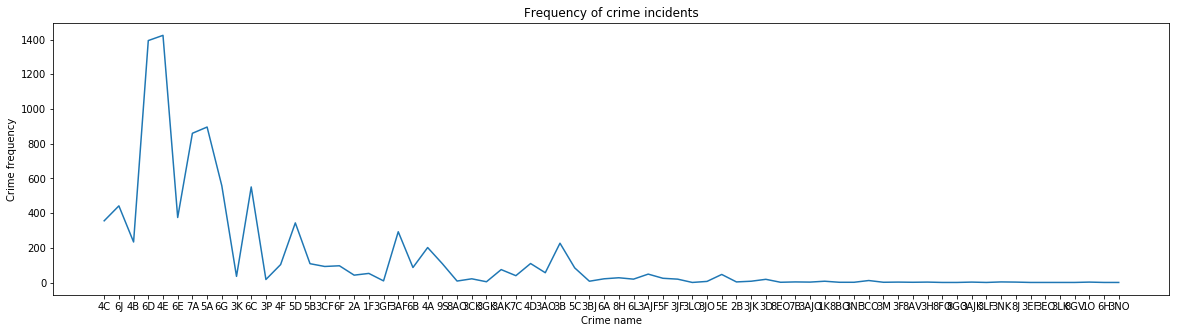

In [10]:
plt.plot(crimes,freq)
plt.xlabel('Crime name')
plt.ylabel('Crime frequency')
plt.title('Frequency of crime incidents')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

### Q4) From graph we can say that most frequent crime  is 4E

In [11]:
mpcrime2 = {}
htmp = {}

with open('baltimore_crimes.csv') as f1:
    csv_reader = csv.reader(f1,delimiter=',')
    line_count= 0
    for row in csv_reader:
        if(line_count==0):
            #print(f'{", ".join(row)}')
            line_count += 1
        else:
            #print(row[0])
            if(row[2]=='4E'):
                try:
                    mpcrime2[row[1][0:2]] += 1
                except:
                    mpcrime2[row[1][0:2]] = 1
                try:
                    htmp[row[3]] += 1
                except:
                    htmp[row[3]] = 1
            line_count += 1


In [12]:
tm = range(24)
freq = [0]*24
mx = 0
ans = ""
for i in mpcrime2:
    freq[int(float(i))] = mpcrime2[i]
    if mx<mpcrime2[i]:
        mx = mpcrime2[i]
        ans = i
print(ans)

19


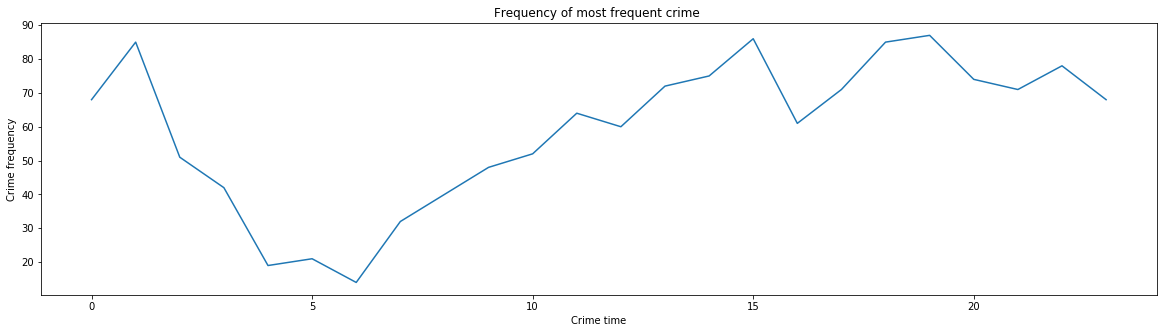

In [13]:
plt.plot(tm,freq)
plt.xlabel('Crime time')
plt.ylabel('Crime frequency')
plt.title('Frequency of most frequent crime ')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

### Q4) Crime 4E occur most often in 19:00-19:59 HRS

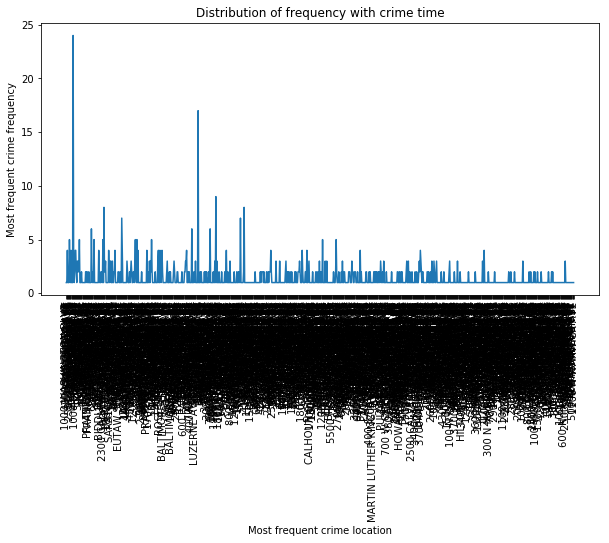

In [14]:
plt.plot(htmp.keys(),htmp.values())
plt.xlabel('Most frequent crime location')
plt.ylabel('Most frequent crime frequency')
plt.title('Distribution of frequency with crime time')
plt.rcParams['figure.figsize'] = [30, 10]
plt.xticks(rotation=90)
plt.show()

In [49]:
latitudes_crime = []
longitudes_crime = []
with open('baltimore_crimes.csv') as f:
    csv_reader = csv.reader(f,delimiter=',')
    line_count= 0
    cnt = {}
    for row in csv_reader:
        if(line_count==0):
            line_count+=1
        else:
            latitudes_crime.append(float(row[9].split(',')[0][1:].replace('\U00002013', '-')))
            longitudes_crime.append(float(row[9].split(',')[-1][:-1].replace('\U00002013', '-')))
            line_count += 1
            

In [50]:
import gmplot

gmap = gmplot.GoogleMapPlotter(39.28301, -76.62475, 16)

gmap.heatmap(latitudes_crime, longitudes_crime)

gmap.draw("heatmap_crime.html")

## Q2.) This will create a file in this directory with name 'heatmap_crime.html' which will contain the heatmap of crime.

In [51]:
latitudes_crime = []
longitudes_crime = []
with open('baltimore_crimes.csv') as f:
    csv_reader = csv.reader(f,delimiter=',')
    line_count= 0
    cnt = {}
    for row in csv_reader:
        if(line_count==0):
            line_count+=1
        else:
            if(row[2] == '4E'):
                latitudes_crime.append(float(row[9].split(',')[0][1:].replace('\U00002013', '-')))
                longitudes_crime.append(float(row[9].split(',')[-1][:-1].replace('\U00002013', '-')))
            line_count += 1
            

In [52]:
import gmplot

gmap = gmplot.GoogleMapPlotter(39.28301, -76.62475, 16)

gmap.heatmap(latitudes_crime, longitudes_crime)

gmap.draw("heatmap_most_popular_crime.html")

## Q4.) This will store heatmap of most popular crime i.e, '4E', in the html file. And from the plot we can clearly see that it is evenly spread across the city.